In [1]:
import ROOT
import matplotlib.pyplot as plt
from root_numpy import root2array, list_branches
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['font.size'] = 14

In [3]:
# helper function
def binwidth(h):
    binEdges = h[1]
    width = binEdges[1] - binEdges[0]
    return width

In [6]:
filename_200 = 'tancredi/nw-seta200-stop70-20150831-191212.root'
filename_100 = 'tancredi/nw-seta100-stop70-20150831-191203.root'
filename_50 = 'tancredi/nw-seta50-stop70-20150910-103325.root'

data_100 = root2array(filename_100, treename='Neutrino Weighting')
truth_100 = root2array(filename_100, treename='Truth')
data_200 = root2array(filename_200, treename='Neutrino Weighting')
truth_200 = root2array(filename_200, treename='Truth')
data_50 = root2array(filename_50, treename='Neutrino Weighting')
truth_50 = root2array(filename_50, treename='Truth')

In [5]:
data_200.dtype.names

('id',
 'eta',
 'm',
 'phi',
 'pt',
 'px',
 'py',
 'pz',
 'Et_miss',
 'b_delta_R',
 'b_delta_phi',
 'l_delta_R',
 'l_delta_R_boosted',
 'l_delta_phi',
 'l_delta_phi_boosted',
 'lm_b1_delta_R',
 'lm_b1_delta_phi',
 'lm_b2_delta_R',
 'lm_b2_delta_phi',
 'lm_pt',
 'lm_reco_id',
 'lp_b1_delta_R',
 'lp_b1_delta_phi',
 'lp_b2_delta_R',
 'lp_b2_delta_phi',
 'lp_pt',
 'lp_reco_id',
 'mW_m',
 'mW_p',
 'nuBar_eta',
 'nuBar_phi',
 'nuBar_pt',
 'nuBar_px',
 'nuBar_py',
 'nuBar_pz',
 'nuBar_reco_id',
 'nu_eta',
 'nu_phi',
 'nu_pt',
 'nu_px',
 'nu_py',
 'nu_pz',
 'nu_reco_id',
 'px_miss',
 'py_miss',
 'pz_miss',
 't_delta_R',
 't_delta_phi',
 't_weight',
 'tb_weight',
 'ttBar_bBar_delta_R',
 'ttBar_bBar_delta_phi',
 'ttBar_b_delta_R',
 'ttBar_b_delta_phi',
 'ttBar_eta',
 'ttBar_lm_delta_R',
 'ttBar_lm_delta_phi',
 'ttBar_lp_delta_R',
 'ttBar_lp_delta_phi',
 'ttBar_m',
 'ttBar_pt',
 'weight')

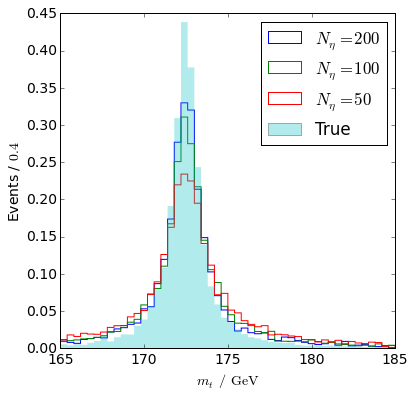

In [15]:
m_bins = 50
m_limits = (165, 185)

f, ax = plt.subplots()
plt.hist(data_200["m"], m_bins, m_limits, weights=data_200['weight'],
         histtype="step", label=r'$N_\eta = 200$', normed=True)
h = plt.hist(data_100["m"], m_bins, m_limits, weights=data_100['weight'],
             histtype="step", label=r'$N_\eta = 100$', normed=True)
plt.hist(data_50["tBar_m"], m_bins, m_limits, weights=data_50['weight'],
         histtype="step", label=r'$N_\eta = 50$', normed=True)
plt.hist(truth_100["m"], m_bins, m_limits, weights=truth_100['weight'],
         histtype="stepfilled", alpha=0.3, label=r'True', edgecolor='None', normed=True)
plt.legend(loc='best')
plt.ylabel(r'Events / ${}$'.format(binwidth(h)))
plt.xlabel(r'$m_t\,/\,\mathrm{GeV}$')
plt.savefig('build/plots/notebooks/sample_comparison_m.pdf')

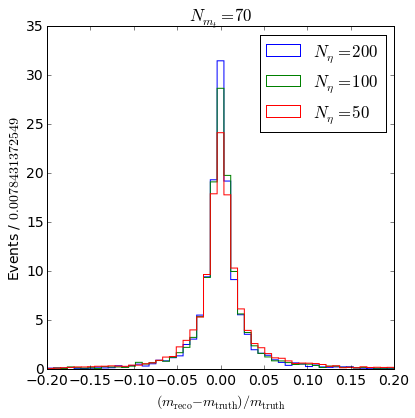

In [17]:
diff_bins = 51
diff_limits = (-0.2, 0.2)

diff_100 = (data_100['m'] - truth_100['m']) / truth_100['m']
diff_200 = (data_200['m'] - truth_200['m']) / truth_200['m']
diff_50 = (data_50['tBar_m'] - truth_50['tBar_m']) / truth_50['tBar_m']

f, ax = plt.subplots()
plt.hist(diff_200, diff_bins, diff_limits, histtype="step", label=r'$N_\eta = 200$',
         weights=data_200['weight'], normed=True)
h = plt.hist(diff_100, diff_bins, diff_limits, histtype="step", label=r'$N_\eta = 100$',
             weights=data_100['weight'], normed=True)
plt.hist(diff_50, diff_bins, diff_limits, histtype="step", label=r'$N_\eta = 50$',
         weights=data_50['weight'], normed=True)
plt.legend(loc='best')
plt.title(r'$N_{m_t} = 70$')
plt.ylabel(r'Events / ${}$'.format(binwidth(h)))
plt.xlabel(r'$(m_\mathrm{reco} - m_\mathrm{truth}) / m_\mathrm{truth}$')
plt.xlim(diff_limits)
plt.tight_layout()
plt.savefig('build/plots/notebooks/performance_eta.pdf')

In [ ]:
diff_bins = 51
diff_limits = (-0.2, 0.2)

diff_100 = (data_100['m'] - truth_100['m']) / truth_100['m']
diff_200 = (data_200['m'] - truth_200['m']) / truth_200['m']
diff_50 = (data_50['tBar_m'] - truth_50['tBar_m']) / truth_50['tBar_m']

f, ax = plt.subplots()
plt.hist(diff_200, diff_bins, diff_limits, histtype="step", label=r'$N_\eta = 200$',
         weights=data_200['weight'], normed=True)
h = plt.hist(diff_100, diff_bins, diff_limits, histtype="step", label=r'$N_\eta = 100$',
             weights=data_100['weight'], normed=True)
plt.hist(diff_50, diff_bins, diff_limits, histtype="step", label=r'$N_\eta = 50$',
         weights=data_50['weight'], normed=True)
plt.legend(loc='best')
plt.title(r'$N_{m_t} = 70$')
plt.ylabel(r'Events / ${}$'.format(binwidth(h)))
plt.xlabel(r'$(m_\mathrm{reco} - m_\mathrm{truth}) / m_\mathrm{truth}$')
plt.xlim(diff_limits)
plt.tight_layout()
plt.savefig('build/plots/notebooks/performance_eta.pdf')

In [128]:
data_200_trueTop = root2array('tancredi/nw-seta200-trueTop-20150910-110448.root', treename='Neutrino Weighting')
truth_200_trueTop = root2array('tancredi/nw-seta200-trueTop-20150910-110448.root', treename='Truth')
data_100_trueTop = root2array('tancredi/nw-seta100-trueTop-20150910-140153.root', treename='Neutrino Weighting')
truth_100_trueTop = root2array('tancredi/nw-seta100-trueTop-20150910-140153.root', treename='Truth')
data_10_trueTop = root2array('tancredi/nw-seta10-trueTop-20150910-140110.root', treename='Neutrino Weighting')
truth_10_trueTop = root2array('tancredi/nw-seta10-trueTop-20150910-140110.root', treename='Truth')
data_1_trueTop = root2array('tancredi/nw-seta1-trueTop-20150910-173411.root', treename='Neutrino Weighting')
truth_1_trueTop = root2array('tancredi/nw-seta1-trueTop-20150910-173411.root', treename='Truth')
data_5_trueTop = root2array('tancredi/nw-seta5-trueTop-20150910-150136.root', treename='Neutrino Weighting')
truth_5_trueTop = root2array('tancredi/nw-seta5-trueTop-20150910-150136.root', treename='Truth')
# data_1000_trueTop = root2array('tancredi/nw-seta10', treename='Neutrino Weighting')
# truth_1000_trueTop = root2array('tancredi/nw-seta10-trueTop-20150910-140110.root', treename='Truth')

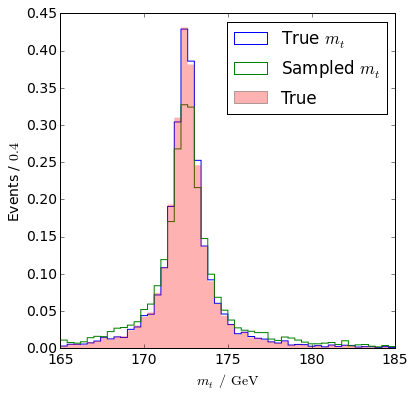

In [137]:
f, ax = plt.subplots()
h = plt.hist(data_200_trueTop["tBar_m"], m_bins, m_limits,
             histtype="step", label=r'True $m_t$', normed=True)
plt.hist(data_200["m"], m_bins, m_limits,
         histtype="step", label=r'Sampled $m_t$', normed=True)
plt.hist(truth_200_trueTop["tBar_m"], m_bins, m_limits,
         histtype="stepfilled", alpha=0.3, label=r'True', edgecolor='None', normed=True)
plt.legend(loc='best')
plt.ylabel(r'Events / ${}$'.format(binwidth(h)))
plt.xlabel(r'$m_t\,/\,\mathrm{GeV}$')
plt.savefig('build/plots/notebooks/topTruth_comparison_m.pdf')

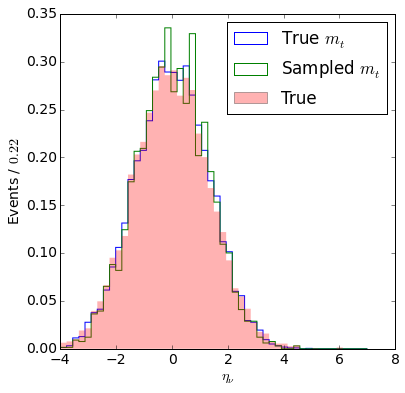

In [98]:
eta_limits = (-4, 7)

f, ax = plt.subplots()
var = 'nu_eta'
h = plt.hist(data_200_trueTop[var], m_bins, eta_limits,
             histtype="step", label=r'True $m_t$', normed=True)
plt.hist(data_200[var], m_bins, eta_limits,
         histtype="step", label=r'Sampled $m_t$', normed=True)
plt.hist(truth_200_trueTop[var], m_bins, eta_limits,
         histtype="stepfilled", alpha=0.3, label=r'True', edgecolor='None', normed=True)
plt.legend(loc='best')
plt.ylabel(r'Events / ${}$'.format(binwidth(h)))
plt.xlabel(r'$\eta_\nu$')
plt.savefig('build/plots/notebooks/topTruth_comparison_eta.pdf')

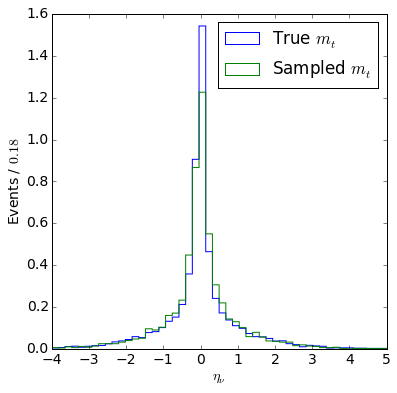

In [136]:
eta_limits = (-4, 5)

eta_diff_200_trueTop = data_200_trueTop[var] - truth_200_trueTop[var]
eta_diff_200 = data_200[var] - truth_200[var]

f, ax = plt.subplots()
var = 'nuBar_eta'
h = plt.hist(eta_diff_200_trueTop, m_bins, eta_limits,
             histtype="step", label=r'True $m_t$', normed=True)
plt.hist(eta_diff_200, m_bins, eta_limits,
        histtype="step", label=r'Sampled $m_t$', normed=True)
plt.legend(loc='best')
plt.ylabel(r'Events / ${}$'.format(binwidth(h)))
plt.xlabel(r'$\eta_\nu$')
plt.savefig('build/plots/notebooks/topTruth_comparison_eta.pdf')

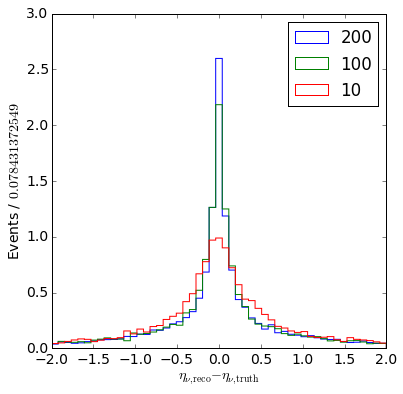

In [135]:
eta_diff_bins = 51
eta_limits = (-2, 2)

var = 'nuBar_eta'

eta_diff_100_trueTop = data_100_trueTop[var] - truth_100_trueTop[var]
eta_diff_10_trueTop = data_10_trueTop[var] - truth_10_trueTop[var]
eta_diff_5_trueTop = data_5_trueTop[var] - truth_5_trueTop[var]
eta_diff_1_trueTop = data_1_trueTop[var] - truth_1_trueTop[var]

f, ax = plt.subplots()
h = plt.hist(eta_diff_200_trueTop, eta_diff_bins, eta_limits,
             histtype="step", label=r'200', normed=True)
plt.hist(eta_diff_100_trueTop, eta_diff_bins, eta_limits,
             histtype="step", label=r'100', normed=True)
plt.hist(eta_diff_10_trueTop, eta_diff_bins, eta_limits,
         histtype="step", label=r'10', normed=True)
# plt.hist(eta_diff_5_trueTop, eta_diff_bins, eta_limits,
#          histtype="step", label=r'5', normed=True)
# plt.hist(eta_diff_1_trueTop, eta_diff_bins, eta_limits,
 #         histtype="step", label=r'1', normed=True)
plt.legend(loc='best')
plt.ylabel(r'Events / ${}$'.format(binwidth(h)))
plt.xlabel(r'$\eta_{\nu,\mathrm{reco}} - \eta_{\nu,\mathrm{truth}}$')
plt.savefig('build/plots/notebooks/eta_sample_comparison_eta.pdf')